## Подготовка:

In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('/Users/aleksandr/Downloads/features.csv')
data.head()

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
0,0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,0,1,11,4,3,1058,996,12,0,0,6,42,4,1085,986,12,0,0,4,21,5,2052,1536,23,0,0,6,37,3,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,2874,1,1796,0,51,0
1,1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,0,0,5,39,5,1960,1384,16,0,0,8,88,3,640,566,1,0,1,5,79,3,720,1350,2,2,0,12,7,2,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,2463,1,1974,0,63,1
2,2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,0,0,9,22,5,2305,2028,19,1,1,10,66,3,1024,959,19,0,1,10,86,3,755,620,3,0,0,8,29,4,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,2130,0,0,1830,0,63
3,3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,0,0,6,96,5,1878,1174,17,0,0,6,48,3,732,1468,22,0,0,10,15,4,1681,1051,11,0,0,7,102,2,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,1459,0,1920,2047,50,63
4,4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,0,0,8,26,3,704,586,1,0,2,9,69,3,1169,1665,20,1,0,7,22,3,1055,638,1,0,0,9,25,5,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,2449,0,4,1974,3,63


## Градиентный бустинг:

Заметим, что целевая переменная записана в столбце radiant_win. Выделим ее в отдельный series. Кроме того удалим признаки, связанные с итогами матча. Кроме того удалим ID матча, так как это не влияет на результат игры.

In [3]:
target = data['radiant_win']
data = data.drop(['match_id', 'duration', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire', 'radiant_win'], axis=1)
data.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,0,1,11,4,3,1058,996,12,0,0,6,42,4,1085,986,12,0,0,4,21,5,2052,1536,23,0,0,6,37,3,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,0,0,5,39,5,1960,1384,16,0,0,8,88,3,640,566,1,0,1,5,79,3,720,1350,2,2,0,12,7,2,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,0,0,9,22,5,2305,2028,19,1,1,10,66,3,1024,959,19,0,1,10,86,3,755,620,3,0,0,8,29,4,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,0,0,6,96,5,1878,1174,17,0,0,6,48,3,732,1468,22,0,0,10,15,4,1681,1051,11,0,0,7,102,2,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,0,0,8,26,3,704,586,1,0,2,9,69,3,1169,1665,20,1,0,7,22,3,1055,638,1,0,0,9,25,5,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [4]:
data.count()

start_time                     97230
lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r4_hero                        97230
r

Пропуски в данных имеются в следующих столбцах:first_blood_time (20%),first_blood_team (20%),first_blood_player1 (20%),first_blood_player2 (45%),radiant_bottle_time (16%),radiant_courier_time (1%),radiant_flying_courier_time (18%),radiant_first_ward_time (2%),dire_bottle_time (16%),dire_courier_time (1%),dire_flying_courier_time (27%),dire_first_ward_time (2%).

Заметим, что все эти признаки являются временными (first_blood_team, first_blood_player1, first_blood_player2 напрямую связаны с first_blood_time). Исходя из этого, можно предположить, что пропуски означают, что данное игровое событие еще не произошло. Тк используем бустинг над деревьями, то лучшим вариантом является замена пропуска на очень большое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева.

In [5]:
data['first_blood_time'].describe()

count    77677.000000
mean        97.688029
std         82.625879
min        -78.000000
25%         15.000000
50%         93.000000
75%        155.000000
max        300.000000
Name: first_blood_time, dtype: float64

Будем заменять пропуски на 1000 (это достаточное большое значение и для столбцов со временем и для столбцов first_blood_team, first_blood_player1, first_blood_player2). Стоит отметить, что часть данных имеют значения меньше 0, что может показаться странным, но в игре такое возможно.

In [6]:
data.fillna(value=1000, inplace=True)

Подберем оптимальные значения параметра n_estimators (количество деревьев):

In [152]:
scores = []
for number in range(1, 12):
    kf=KFold(n_splits=5, shuffle=True)
    classifier=GradientBoostingClassifier(n_estimators=number*10)
    quality=cross_val_score(classifier, data, target, cv=kf, scoring='roc_auc')
    scores.append(np.mean(quality))

Визуализируем полученные значения:

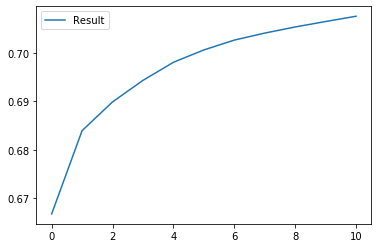

In [153]:
plt.plot(scores, label='Result')
plt.legend()

Произведем замер времени для 30 деревьев:

In [77]:
import time
import datetime

start_time = datetime.datetime.now()

kf=KFold(n_splits=5, shuffle=True)
classifier=GradientBoostingClassifier(n_estimators=number+10)
quality=cross_val_score(classifier, data, target, cv=kf, scoring='roc_auc')

print('Time elapsed:', datetime.datetime.now() - start_time)
print(np.mean(quality))

Time elapsed: 0:00:38.293303
0.68381582974453


Теперь аналогичные замеры для 120 деревьев:

In [75]:
start_time = datetime.datetime.now()

kf=KFold(n_splits=5, shuffle=True)
classifier=GradientBoostingClassifier(n_estimators=120)
quality=cross_val_score(classifier, data, target, cv=kf, scoring='roc_auc')

print('Time elapsed:', datetime.datetime.now() - start_time)
print(np.mean(quality))

Time elapsed: 0:03:26.031020
0.7081702394559466


Попробуем ускорить, изменив параметр max_depth, и посмотрим как это отразится на качестве:

In [76]:
start_time = datetime.datetime.now()

kf=KFold(n_splits=5, shuffle=True)
classifier=GradientBoostingClassifier(n_estimators=120, max_depth=2)
quality=cross_val_score(classifier, data, target, cv=kf, scoring='roc_auc')

print('Time elapsed:', datetime.datetime.now() - start_time)
print(np.mean(quality))

Time elapsed: 0:01:48.894098
0.7045584009310784


Видно, что время прилично уменьшилось и практически достигло полторы минуты. Попробуем теперь сократить количество деревьев для баланса между качеством и временем:

In [79]:
start_time = datetime.datetime.now()

kf=KFold(n_splits=5, shuffle=True)
classifier=GradientBoostingClassifier(n_estimators=90, max_depth=2)
quality=cross_val_score(classifier, data, target, cv=kf, scoring='roc_auc')

print('Time elapsed:', datetime.datetime.now() - start_time)
print(np.mean(quality))

Time elapsed: 0:01:21.650253
0.7005161483548468


## Отчет №1:

1) Признаки с пропусками:first_blood_time, first_blood_team, first_blood_player1, first_blood_player2, radiant_bottle_time, radiant_courier_time, radiant_flying_courier_time, radiant_first_ward_time, dire_bottle_time, dire_courier_time, dire_flying_courier_time, dire_first_ward_time. Причина пропусков - данное игровое событие не наступило в первые 5 минут матча.

2) Целевая переменная записана в столбце radiant_win.

3) Кроссвалидация для 30 деревьев длилась 38 секунд, а усредненный по фолдам показатель метрики качества AUC-ROC составил 0.68381582974453. 

4) По проведенным опытам видно, что при увеличении количества деревьев растет качество алгоритма. Однако, вместе с тем увеличивается время работы. Исходя из соотношений данных увеличений лучше использовать 30 деревьев. Т.к. время возросло более чем в 2 раза (с 0:38 до 3:26), а качество лишь на 0.025. Но возможно сократить это время с наименьшим ущербом для качества.

Время работы алгоритма можно уменьшить следующими способами:

a) Использовать для обучения и кросс-валидации не всю выборку, а некоторое ее подмножество.

b) Упростить модель изменением параметров — например, уменьшить глубину деревьев в градиентом бустинге (max_depth).

Данные способы действительно работают. В итоге мне удалось подобрать следующие значения параметров: n_estimators=100, max_depth=2, при времени работы 1:21 и значении качества 0.7005161483548468. Данные показатели я считаю оптимальными.

## Логистическая регрессия:

Для начала подготовим данные, проведя маштабирование:

In [7]:
data = pd.read_csv('/Users/aleksandr/Downloads/features.csv')
target = data['radiant_win']
data = data.drop(['match_id', 'duration', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire', 'radiant_win'], axis=1)
data.fillna(value=0, inplace=True)
scaler = StandardScaler()
trans_data = scaler.fit_transform(data)

Подберем значение параметра L2-регуляризации:

In [39]:
scores = []
C_pow_range = range(-5, 6)
C_range = [10.0 ** i for i in C_pow_range]
for number in C_range:
    start_time = datetime.datetime.now()
    clf = LogisticRegression(C=number, solver='sag')
    kf=KFold(n_splits=5, shuffle=True)
    quality=cross_val_score(clf, trans_data, target, cv=kf, scoring='roc_auc')
    scores.append(np.mean(quality))
    print('Score:', np.mean(quality))
    print('Time elapsed:', datetime.datetime.now() - start_time)

Score: 0.6951558383707331
Time elapsed: 0:00:07.420760
Score: 0.7111838427326732
Time elapsed: 0:00:08.160969
Score: 0.7163710403283308
Time elapsed: 0:00:09.700481
Score: 0.7164821209073563
Time elapsed: 0:00:11.752119
Score: 0.7164382453006576
Time elapsed: 0:00:12.678208
Score: 0.7165395058561064
Time elapsed: 0:00:12.784718
Score: 0.7164109976703612
Time elapsed: 0:00:12.712560
Score: 0.7163544160453028
Time elapsed: 0:00:12.483435
Score: 0.7163207522590999
Time elapsed: 0:00:12.974162
Score: 0.7164745728306472
Time elapsed: 0:00:12.585126
Score: 0.7165432679684648
Time elapsed: 0:00:12.352362


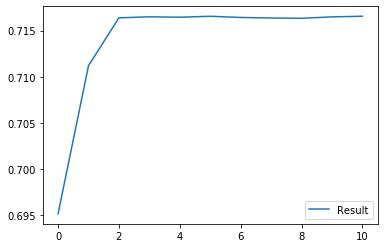

In [40]:
plt.plot(scores, label='Result')
plt.legend()

In [41]:
max_score = max(scores)
max_score_index = scores.index(max_score)
print('C: ', C_range[max_score_index], 'score: ', max_score)

C:  100000.0 score:  0.7165432679684648


Качество данной модели 0.7165432679684648, что превосходит результаты градиентного бустинга. Кроме того логистическая регрессия показывает отличную скорость (0:12.35 по сравнению с 1:21.65). Оптимальное значение параметра С=100000.0.

Попробуем удалить категоральные признаки:

In [8]:
new_data = data.drop(['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], axis=1)
trans_data2 = scaler.fit_transform(new_data)
scores = []
C_pow_range = range(-5, 6)
C_range = [10.0 ** i for i in C_pow_range]
for number in C_range:
    start_time = datetime.datetime.now()
    clf = LogisticRegression(C=number, solver='sag')
    kf=KFold(n_splits=5, shuffle=True)
    quality=cross_val_score(clf, trans_data2, target, cv=kf, scoring='roc_auc')
    scores.append(np.mean(quality))
    print('Score:', np.mean(quality))
    print('Time elapsed:', datetime.datetime.now() - start_time)

Score: 0.6950629255900593
Time elapsed: 0:00:07.598806
Score: 0.7112418408719483
Time elapsed: 0:00:07.793348
Score: 0.716290344105957
Time elapsed: 0:00:08.677577
Score: 0.7165002002767265
Time elapsed: 0:00:11.572766
Score: 0.7164249188569207
Time elapsed: 0:00:11.224732
Score: 0.7164123164488237
Time elapsed: 0:00:12.123275
Score: 0.7163410314005837
Time elapsed: 0:00:12.471871
Score: 0.7164103319722115
Time elapsed: 0:00:11.987551
Score: 0.7165838781325231
Time elapsed: 0:00:12.524249
Score: 0.7165429841339817
Time elapsed: 0:00:12.400119
Score: 0.7166823539863674
Time elapsed: 0:00:12.864915


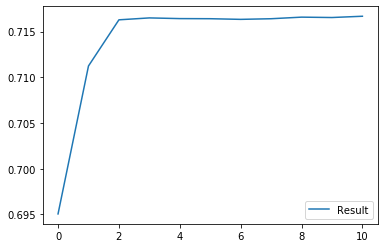

In [9]:
plt.plot(scores, label='Result')
plt.legend()

In [10]:
max_score = max(scores)
max_score_index = scores.index(max_score)
print('C: ', C_range[max_score_index], 'score: ', max_score)

C:  100000.0 score:  0.7166823539863674


Качество изменилось ничтожно мало (с 0.7165432679684648 до 0.7166289732533785). Это говорит о том, что работать с категоральными признаками, как с числовыми, все равно, что вовсе удалить их. Поэтому необходимо их кодировать. Для начала определим количество героев в игре:

In [11]:
heroes = pd.read_csv('/Users/aleksandr/Downloads/data/dictionaries/heroes.csv')
print('Всего героев в игре:', len(heroes))

Всего героев в игре: 112


Воспользуемся подходом "мешок слов" для кодирования информации о героях:

In [12]:
data = pd.read_csv('/Users/aleksandr/Downloads/features.csv')
target = data['radiant_win']
data = data.drop(['duration', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire', 'radiant_win'], axis=1)
data.fillna(value=0, inplace=True)
X_pick = np.zeros((data.shape[0], len(heroes)))
for i, match_id in enumerate(data.index):
    for p in range(5):
        X_pick[i, data.ix[match_id, 'r%d_hero' % (p + 1)] - 1] = 1
        X_pick[i, data.ix[match_id, 'd%d_hero' % (p + 1)] - 1] = -1
X_hero = pd.DataFrame(X_pick, index=data.index)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [13]:
data = data.drop(['match_id', 'lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], axis=1)
data.fillna(value=0, inplace=True)
scaler = StandardScaler()
trans_data = pd.DataFrame(scaler.fit_transform(data), index=data.index)
X_train = pd.concat([trans_data, X_hero], axis=1)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111
0,-2.544364,1.400808,1.525972,0.734957,0.969743,-0.537757,-0.578083,-0.509023,-0.332256,-0.625222,-0.255162,-0.052580,-0.533149,-0.582396,-1.756715,1.50723,1.308568,0.095346,-0.037204,-0.529081,-0.578154,-0.112095,-0.282744,-0.729830,-0.757388,-0.446505,-0.525343,-0.579877,-0.525183,-0.277630,-0.771379,-0.935772,-0.669994,-0.524078,1.052453,1.115474,-0.417344,-0.322641,-0.337650,0.082842,-0.548801,-0.564562,-0.928921,0.561134,-0.208412,-0.272358,0.173184,-0.540261,-0.569909,-1.774695,1.488903,1.558823,0.961587,1.416964,-0.538253,-0.571065,-0.947053,-0.311205,-0.785580,-1.312874,-0.905651,-0.53886,-0.56754,-0.131690,-0.316231,-0.398260,-0.192406,-0.794164,0.976866,-0.565289,0.278256,-0.849902,1.182703,1.681514,-0.788219,0.378538,-0.029781,0.876751,-0.514555,-1.136970,-0.532046,-0.987486,1.066448,-0.041743,-0.262922,0.640648,0.018054,0.562864,-0.551154,1.846004,-1.121494,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.540452,0.501314,-0.080139,-0.247570,-0.246859,-0.537757,1.017574,1.492930,0.578881,0.732454,-0.250795,-0.052580,-0.533149,1.019572,-0.524101,0.59158,0.582307,0.884835,0.856569,1.014674,-0.578154,-0.521910,-0.282744,-0.889558,-1.001642,-0.334372,-0.525343,-0.579877,-0.525183,-1.190175,-1.344598,-1.198371,-1.005251,-0.524078,-0.573665,-1.352836,1.392776,1.286498,0.507465,0.526938,-0.548801,-0.564562,-0.119890,-0.357152,-1.015865,-1.205140,-1.064184,-0.540261,1.072422,-1.362973,-0.347705,-0.859912,0.548265,-0.942193,2.506742,-0.571065,1.517711,-1.232681,-1.337375,-1.127777,-1.131068,-0.53886,-0.56754,-0.543653,0.599652,0.531154,1.183531,1.570177,-0.540155,-0.565289,0.278256,-0.287631,1.182703,1.050584,-0.788219,0.912215,-0.029781,-1.525446,-0.514555,-2.869460,-0.532046,-0.987486,-0.338591,0.578946,-0.262922,0.379585,1.066668,0.562864,0.678170,0.437788,0.043947,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.539231,0.501314,0.151070,0.263085,1.190944,-0.537757,-0.578083,1.492930,-0.332256,0.224676,-0.726779,-0.498410,-0.533149,-0.582396,-0.934972,-0.32407,0.205660,-0.419251,-1.154419,1.014674,-0.578154,-0.931725,1.547927,2.179771,2.251377,1.796163,1.030097,1.043031,-0.937075,-0.277630,0.427498,1.202532,1.900308,-0.524078,-0.573665,0.292704,1.392776,1.901968,1.910183,0.860010,0.925434,1.076171,0.689141,-0.357152,-0.319096,-0.332322,0.960600,-0.540261,1.072422,0.695638,-0.347705,-0.796356,-1.073911,-0.829853,-0.538253,-0.571065,-0.125465,0.610270,0.268676,-0.940451,-0.680234,-0.53886,-0.56754,-0.543653,-0.316231,0.313323,0.939019,1.682765,-0.540155,-0.565289,-0.543829,1.746117,-0.845521,-0.211277,-0.788219,-0.593027,-0.146503,

In [14]:
scores = []
C_pow_range = range(-5, 6)
C_range = [10.0 ** i for i in C_pow_range]
for number in C_range:
    start_time = datetime.datetime.now()
    clf = LogisticRegression(C=number, solver='sag', max_iter=1000)
    kf=KFold(n_splits=5, shuffle=True)
    quality=cross_val_score(clf, X_train, target, cv=kf, scoring='roc_auc')
    scores.append(np.mean(quality))
    print('Score:', np.mean(quality))
    print('Time elapsed:', datetime.datetime.now() - start_time)

Score: 0.6990692929493096
Time elapsed: 0:00:11.834147
Score: 0.7250357281899057
Time elapsed: 0:00:13.577983
Score: 0.7460678441469405
Time elapsed: 0:00:14.712632
Score: 0.7516392858292399
Time elapsed: 0:00:22.399809
Score: 0.7517788528680541
Time elapsed: 0:01:08.130686
Score: 0.7515972938066837
Time elapsed: 0:01:19.978555
Score: 0.7520471122022634
Time elapsed: 0:01:29.049165
Score: 0.7517370160656291
Time elapsed: 0:01:29.958805
Score: 0.7518345813181069
Time elapsed: 0:01:32.701022
Score: 0.7517669925676905
Time elapsed: 0:01:33.244194
Score: 0.7517512296818802
Time elapsed: 0:01:33.149713


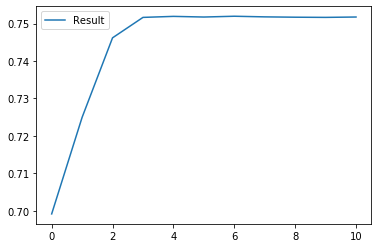

In [67]:
plt.plot(scores, label='Result')
plt.legend()

In [68]:
max_score = max(scores)
max_score_index = scores.index(max_score)
print('C: ', C_range[max_score_index], 'score: ', max_score)

C:  10.0 score:  0.7519690331772674


Лучшее значение параметра С по качеству 10.0. Однако разумнее будет использовать С=0.01, потому что качество изменится незначительно, но время уменьшится более чем в 3 раза.

После кодирования категоральных признаков качество увеличилось на примерно 0.035. Это говорит о том, что герои действительно являются важными признаками.

## Предсказание на тестовой выборке:

In [138]:
data_test = pd.read_csv('/Users/aleksandr/Downloads/features_test.csv')
match_id = data_test['match_id']
data_test.head()

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,6,1430287923,0,93,4,1103,1089,8,0,1,9,102,3,1183,963,9,0,2,9,52,5,2289,2043,20,2,0,6,53,3,917,1006,14,0,0,6,57,3,1344,933,3,0,0,9,26,3,1122,949,5,1,0,10,89,4,1847,1866,25,1,0,10,20,3,841,1015,2,1,0,9,29,3,1091,918,6,0,1,8,39,5,1674,1048,12,0,1,7,1.0,0.0,2.0,NaN,72.0,-82.0,NaN,2,2,3,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
1,7,1430293357,1,20,2,556,570,1,0,0,9,6,4,1194,1386,21,0,0,7,65,4,1374,1064,13,0,1,8,92,2,774,737,0,1,0,8,43,5,2254,1787,24,0,0,6,54,3,909,970,16,0,0,5,34,4,1543,929,10,0,0,7,93,4,1485,1389,19,0,0,14,99,3,1075,718,3,0,1,7,5,4,1130,994,1,1,0,10,84.0,1.0,9.0,NaN,138.0,-82.0,233.0,2,6,2,2,-29.0,168.0,-54.0,NaN,3,2,2,1,16.0
2,10,1430301774,1,112,2,751,808,1,0,0,13,26,2,421,569,3,0,0,6,29,3,960,896,3,1,2,6,11,5,1877,1511,23,0,0,8,41,4,1581,1593,26,0,0,4,91,3,687,675,1,0,0,1,22,2,515,793,4,0,0,8,10,3,964,1022,12,0,0,8,49,5,2434,1917,22,0,0,9,54,4,1372,2005,24,2,1,11,168.0,1.0,9.0,NaN,33.0,-88.0,NaN,5,4,3,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
3,13,1430323933,1,27,3,708,903,1,1,1,11,91,2,672,901,6,0,0,8,74,5,2141,1626,28,0,0,7,52,4,1579,2169,28,2,0,7,2,5,1960,1668,27,0,0,8,110,4,1255,704,5,0,1,6,25,2,490,648,1,0,1,9,77,4,1308,1355,22,0,0,7,62,2,536,692,0,1,1,6,49,4,1815,1424,18,0,0,5,55.0,0.0,3.0,NaN,208.0,-78.0,180.0,4,2,2,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
4,16,1430331112,1,39,4,1259,661,4,0,0,9,93,5,1703,964,10,0,1,6,30,3,1099,942,2,1,0,6,85,3,1285,1013,10,0,0,8,102,2,484,609,4,0,0,8,14,4,2273,1680,16,1,0,6,64,2,511,541,1,0,0,4,70,4,1135,1399,19,0,0,10,3,3,623,520,1,0,0,10,96,5,1884,1409,15,0,1,11,285.0,1.0,5.0,NaN,225.0,-76.0,NaN,1,3,2,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0


In [79]:
data_test.fillna(value=0, inplace=True)
X_test_pick = np.zeros((data_test.shape[0], len(heroes)))
for i, match_id in enumerate(data_test.index):
    for p in range(5):
        X_test_pick[i, data_test.ix[match_id, 'r%d_hero' % (p + 1)] - 1] = 1
        X_test_pick[i, data_test.ix[match_id, 'd%d_hero' % (p + 1)] - 1] = -1
X_hero_test = pd.DataFrame(X_test_pick, index=data_test.index)
data_test = data_test.drop(['match_id', 'lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], axis=1)
scaler = StandardScaler()
trans_data_test = pd.DataFrame(scaler.fit_transform(data_test), index=data_test.index)
X_test = pd.concat([trans_data_test, X_hero_test], axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [80]:
clf = LogisticRegression(C=0.01, solver='sag')
clf.fit(X_train, target)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
predictions = clf.predict_proba(X_test)

In [141]:
Pred = ['radiant_win', 'Pred_d']
answer = pd.DataFrame(predictions, columns=Pred, index=match_id)
answer.drop(['Pred_d'], inplace=True, axis=1)
answer

,radiant_win
match_id,
6,0.185978
7,0.254561
10,0.804906
13,0.129456
16,0.758704
...,...
114369,0.281123
114377,0.369862
114378,0.770886


In [145]:
answer.to_csv('answer.csv')

## Отчет №2:

1) Качество данной модели 0.7165432679684648, что превосходит результаты градиентного бустинга. Кроме того логистическая регрессия показывает отличную скорость (0:12.35 по сравнению с 1:21.65). Оптимальное значение параметра С=100000.0.

2) Качество изменилось ничтожно мало (с 0.7165432679684648 до 0.7166289732533785). Следовательно, вес этих параметров в предыдушей модели был близок к нулю.

3) Всего героев в игре: 112

4) Добавление "мешка слов" улучшило качество предсказания. Значение AUC-ROC улучшилось до 0.7516614618619853 при C = 0.01. Это объясняется тем, что вместо отсутствия данных о героях или случайного шума из id мы имеем осмысленную разреженную матрицу для построения предсказания.

5) Минимальное значение показателя AUC-ROC у лучшего алгоритма равно 0.69 при C=0.00001.

   Максимальное значение показателя AUC-ROC у лучшего алгоритма алгоритма равно 0.751 при C=0.1.